# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

2025-08-19 00:29:54.030903: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-19 00:29:54.108892: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-19 00:29:56.238597: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


# Load Data

In [ ]:

# Load the processed 'Adj Close' data
try:
    data = pd.read_csv('../data/adj_close.csv', index_col=0, parse_dates=True)
    if isinstance(data.columns, pd.MultiIndex):
        # Assuming the ticker is the last level or identifiable
        new_cols = []
        for col_tuple in data.columns:
            if 'TSLA' in col_tuple:
                new_cols.append('TSLA')
            elif 'BND' in col_tuple:
                new_cols.append('BND')
            elif 'SPY' in col_tuple:
                new_cols.append('SPY')
            else:
                new_cols.append('_'.join(map(str, col_tuple)).replace('UNNAMED: ', '').replace('_LEVEL_2', ''))
        data.columns = new_cols
        data = data[['TSLA', 'BND', 'SPY']] # Ensure order and correct selection

    print("Data loaded successfully from adj_close.csv!")
    print("Columns in loaded data:", data.columns)
except Exception as e:
    print(f"Error loading data from adj_close.csv: {e}")
    print("Please ensure 'adj_close.csv' is correctly generated from Task 1 and contains the 'Adj Close' prices.")
    # Fallback if adj_close.csv somehow fails, try to use raw_data and re-extract
    try:
        raw_data = pd.read_csv('../data/financial_data.csv', header=[0, 1], index_col=0, parse_dates=True)
        # Select only the 'Adj Close' prices, which simplifies the DataFrame
        data = raw_data['Adj Close']
        # Rename columns to just ticker names
        data.columns = ['BND', 'SPY', 'TSLA']
        print("Successfully re-extracted 'Adj Close' from 'financial_data.csv'.")
    except Exception as e_fallback:
        print(f"Fallback failed: {e_fallback}. Cannot proceed without proper data.")
        exit() # Exit if data cannot be loaded properly

# Implement Forecasting models and Train models

Data loaded successfully from adj_close.csv!
Columns in loaded data: Index(['('CLOSE', 'BND', 'UNNAMED: 1_LEVEL_2')',
       '('CLOSE', 'SPY', 'UNNAMED: 2_LEVEL_2')',
       '('CLOSE', 'TSLA', 'UNNAMED: 3_LEVEL_2')'],
      dtype='object')

TSLA Data Head:
                 TSLA
2015-07-01  17.943333
2015-07-02  18.667999
2015-07-06  18.648001
2015-07-07  17.858667
2015-07-08  16.997334

Training data shape: (2140, 1)
Testing data shape: (395, 1)

--- Training ARIMA Model (using statsmodels) ---
ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2140
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -6816.645
Date:                Tue, 19 Aug 2025   AIC                          13645.290
Time:                        00:33:51   BIC                          13679.298
Sample:                             0   HQIC                         13657.735
     

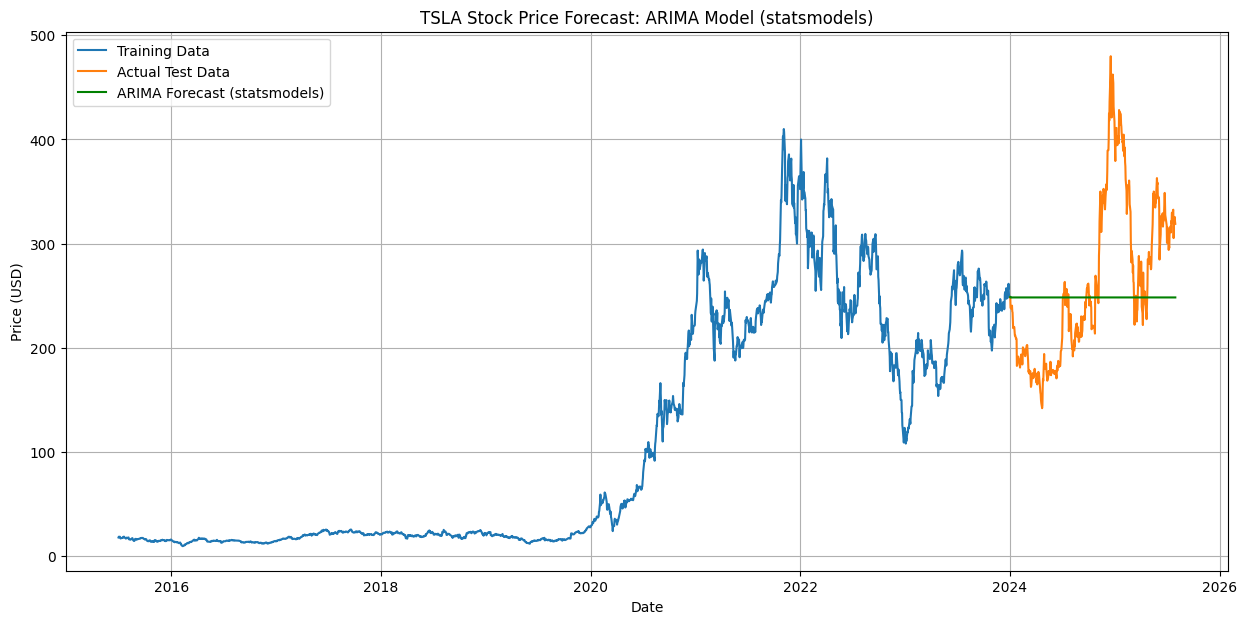


--- Training LSTM Model ---


2025-08-19 00:33:51.929378: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/media/eyuleo/6e17c039-48b9-4b8d-b21c-88f390517fe7/home/eyuleo/Documents/kifya/Week11/venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0126 - val_loss: 0.0031
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0020 - val_loss: 0.0030
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0018 - val_loss: 0.0028
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0021 - val_loss: 0.0028
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0019 - val_loss: 0.0022
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0016 - val_loss: 0.0027
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0013 - val_loss: 0.0027
Epoch 9/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0014 - val_loss: 0.0050
Epoch 10/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 11/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0015 - val_loss: 0.0025
Epoch 12/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step

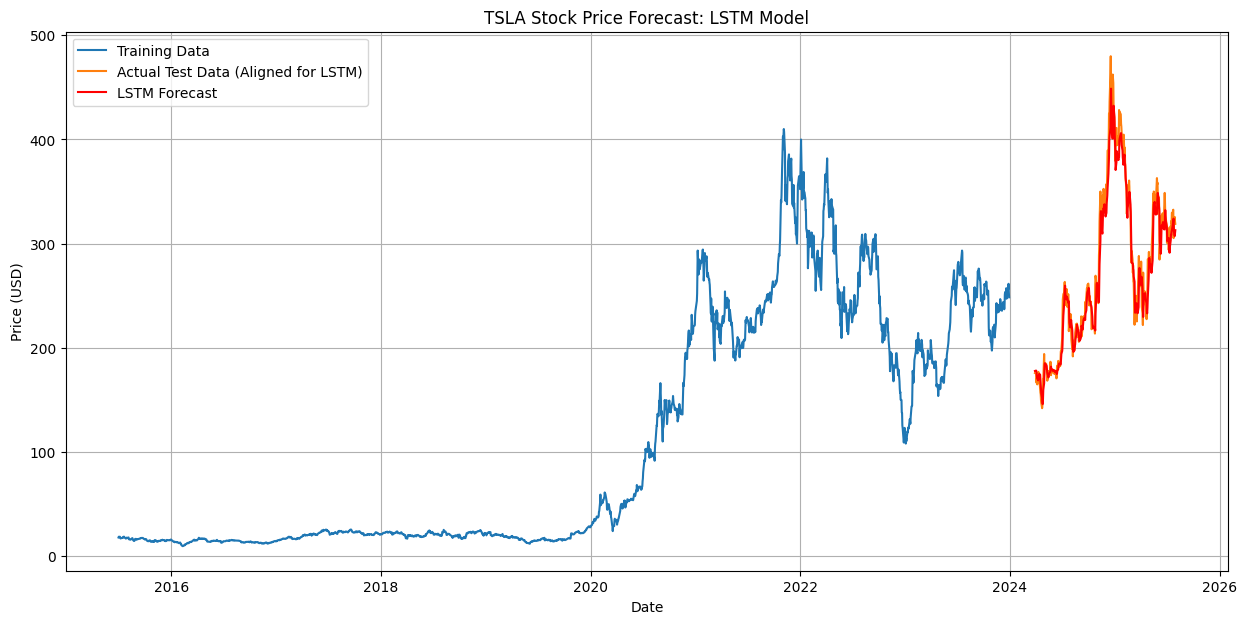

In [ ]:
data.columns = ['BND', 'SPY', 'TSLA']

# We will focus on TSLA for forecasting as per the task description
tsla_data = data[['TSLA']].copy()

print("\nTSLA Data Head:")
print(tsla_data.head())

# --- 1. Data Splitting chronologically---

train_start_date = '2015-07-01'
train_end_date = '2023-12-31'
test_start_date = '2024-01-01'
test_end_date = '2025-07-31'

train_data = tsla_data[train_start_date:train_end_date]
test_data = tsla_data[test_start_date:test_end_date]

print(f"\nTraining data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")

# --- Evaluation Metrics Function ---
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    # Avoid division by zero for MAPE if actual values are zero
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print(f"\n--- {model_name} Model Evaluation ---")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    return mae, rmse, mape

# --- 2. Model Implementation: ARIMA (using statsmodels) ---
print("\n--- Training ARIMA Model (using statsmodels) ---")

order = (5, 1, 0) # (p, d, q)

arima_model_fit = None
try:
    # Fit the ARIMA model
    # The `train_data['TSLA'].values` is used to ensure it's a 1D numpy array
    arima_model = ARIMA(train_data['TSLA'].values, order=order)
    arima_model_fit = arima_model.fit()
    print(f"ARIMA Model Summary:")
    print(arima_model_fit.summary())
except Exception as e:
    print(f"Error training ARIMA model with statsmodels: {e}")

if arima_model_fit:
    # Forecast using ARIMA model
    arima_forecast_array = arima_model_fit.forecast(steps=len(test_data))
    arima_forecast_series = pd.Series(arima_forecast_array, index=test_data.index)

    # Evaluate ARIMA model
    evaluate_model(test_data['TSLA'], arima_forecast_series, "ARIMA (statsmodels)")

    # Plot ARIMA forecast
    plt.figure(figsize=(15, 7))
    plt.plot(train_data['TSLA'], label='Training Data')
    plt.plot(test_data['TSLA'], label='Actual Test Data')
    plt.plot(arima_forecast_series, label='ARIMA Forecast (statsmodels)', color='green')
    plt.title('TSLA Stock Price Forecast: ARIMA Model (statsmodels)')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()


# --- 3. Model Implementation: LSTM ---
print("\n--- Training LSTM Model ---")

# Data Scaling for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_data = scaler.fit_transform(train_data)
scaled_test_data = scaler.transform(test_data)

# Function to create sequences for LSTM
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length), 0])
        y.append(data[i + sequence_length, 0])
    return np.array(X), np.array(y)

sequence_length = 60 # Number of previous days to consider for forecasting the next day
X_train, y_train = create_sequences(scaled_train_data, sequence_length)
X_test, y_test = create_sequences(scaled_test_data, sequence_length)

# Reshape data for LSTM [samples, timesteps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
lstm_model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=1) # Output layer predicts next day's price
])

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model with Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Use validation_split instead of separate validation data for simplicity in this example
history = lstm_model.fit(X_train, y_train,
                         epochs=100,
                         batch_size=32,
                         validation_split=0.2, # Use 20% of training data for validation
                         callbacks=[early_stopping],
                         verbose=1)

# Make predictions on the test data
lstm_predictions_scaled = lstm_model.predict(X_test)
lstm_forecast_prices = scaler.inverse_transform(lstm_predictions_scaled)

test_data_actual_lstm = test_data['TSLA'].iloc[sequence_length:]

# Create a Pandas Series for the LSTM forecast for easy plotting and evaluation
lstm_forecast_series = pd.Series(lstm_forecast_prices.flatten(), index=test_data_actual_lstm.index)

# Evaluate LSTM model
evaluate_model(test_data_actual_lstm, lstm_forecast_series, "LSTM")

# Plot LSTM forecast
plt.figure(figsize=(15, 7))
plt.plot(train_data['TSLA'], label='Training Data')
# Plot actual test data aligned with LSTM predictions
plt.plot(test_data_actual_lstm, label='Actual Test Data (Aligned for LSTM)')
plt.plot(lstm_forecast_series, label='LSTM Forecast', color='red')
plt.title('TSLA Stock Price Forecast: LSTM Model')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()
